<img align="left" src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/tapi-logo-small.png" />

This notebook free for educational reuse under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/).

Created by [Firstname Lastname](https://) for the 2024 Text Analysis Pedagogy Institute, with support from [Constellate](https://constellate.org).

For questions/comments/improvements, email author@email.address.<br />
____

# `Introduction to Semantic Search and Vector Databases` `1`

This is lesson `1` of 3 in the educational series on `Semantic Search and Vector Databases`. This notebook is intended `to teach the basic concepts of vector databases`.

**Skills:** 
* Data analysis
* Machine learning
* Text analysis
* spaCy
* Vector databases
* Semantic search
* Python

**Audience:** `Teachers` / `Learners` / `Researchers`

**Use case:** `Tutorial` / `How-To` / `Explanation` 

`Include the use case definition from [here](https://constellate.org/docs/documentation-categories)`

**Difficulty:** `Intermediate`

`Beginner assumes users are relatively new to Python and Jupyter Notebooks. The user is helped step-by-step with lots of explanatory text.`
`Intermediate assumes users are familiar with Python and have been programming for 6+ months. Code makes up a larger part of the notebook and basic concepts related to Python are not explained.`
`Advanced assumes users are very familiar with Python and have been programming for years, but they may not be familiar with the process being explained.`

**Completion time:** `90 minutes`

**Knowledge Required:** 
```
* Python basics (variables, flow control, functions, lists, dictionaries)
* Object-oriented programming (classes, instances, inheritance)
* Regular Expressions (`re`, character classes)

These should be general skills but can mention a particular library
```

**Knowledge Recommended:**
```
* Basic file operations (open, close, read, write)
```

**Learning Objectives:**
After this lesson, learners will be able to:
```
1. Learn about the foundational concepts of how we represent data numerically, specifically textual data.
2. Learn about TF-IDF representations of texts.
3. Learn about the core concept behind vectors, or embeddings.
4. Learn how to vectorize texts with Python.
5. Learn about the importance of transformer models
```
___

# Required Python Libraries
`List out any libraries used and what they are used for`
* spaCy for processing texts
* [Pandas](https://pandas.pydata.org/) for manipulating and cleaning data.
* numpy for working with arrays
* matplotlib for visualizing data
* sentence-transformers for working with transformers

## Install Required Libraries

In [3]:
### Install Libraries ###

# Using !pip installs
!pip install spacy scikit-learn pandas numpy matplotlib sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.7 MB/s eta 0:00:0000:01


In addition to this, we will be downloading two spaCy models: `en_core_web_md` and `en_core_web_lg`.

In [23]:
!python -m spacy download en_core_web_md

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/Applications/anaconda3/envs/tap/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 53.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [39]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 28.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [1]:
### Import Libraries ###
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Required Data

`List out the data sources, including their formats and a few sentences describing the data. Include a link to the data source description, if possible.`

**Data Format:** 
* image files (.jpg, .png)
* document files (.pdf)
* plain text (.txt)

**Data Source:**
* [Detroit Open Data Portal](https://data.detroitmi.gov/datasets/detroitmi::dpd-citizen-complaints/about)

**Data Quality/Bias:**
`Analysis of this data should consider the following quality and bias issues...`

**Data Description:**

`This lesson uses XXXX data in XXX format from XXXX source. Additional details about the data used.`

## Download Required Data

# Introduction

```
Introduce the lesson topic. Answer questions such as:
* Why is it useful? 
* Why should we learn it? 
* Who might use it? 
* Where has it been used by scholars/industry?
* What do we need to do it?
* What subjects are included in the notebooks?
* What is not in this notebook? Where should we look for it?
```

# Representing Text Numerically



## Why text needs to be represented numerically in computers

At its core, a computer understands and processes numbers, not words. While we humans can easily grasp the meaning of text, computers require a numerical representation to perform any kind of analysis or processing. This numerical representation allows machines to quantify, compare, and manipulate text data efficiently.

Numerical representation is crucial for various text analysis tasks such as classification, clustering, similarity comparison, and machine learning applications. It provides a structured format that algorithms can work with, enabling us to uncover patterns, extract insights, and build predictive models based on textual data.

## How Text was originally represented

In the early days of computing, text was represented using simple encoding schemes like ASCII (American Standard Code for Information Interchange). ASCII assigned a unique number to each character, allowing computers to store and process text as a sequence of numbers. For example, the uppercase letter 'A' was represented by the number 65.

While this approach allowed basic text storage and retrieval, it didn't capture any semantic meaning or context. Each word was treated as an independent entity, making it difficult to perform meaningful analysis or understand relationships between words and documents.

Over the decades, more complex ways to represent text numerically needed to be developed. This is because ASCII could not represent languages other than English due to the limitations of the amount of characters it could represent. As a result, each country or region developed their own encoding standard. Japan, in fact, had three! This was not a problem so long as information remained within a single region or country, but when data encoded in one style was sent to a computer designed to parse a different standard, the entire document broke. It was illegible. This became highly problematic with the advent of the internet. The issue persisted until a collection of scholars came together and came up with Unicode, a universal representation for encoding texts of any language. Today, most documents are (or should be) encoded in Unicode so that anyone, no matter their computer, can parse a document sent from anyone else in the world.

These numbers don't necessarily mean anything. Whether you are using ASCII or UTF-8, these encodings are done at the character-level. They simply allow for your computer to correctly render a specific character for you when it encounters a specific number. When doing text analysis, though, we rarely analyze things at the character-level. Often the smallest unit with which we work occurs at the word-level. How then, do we represent words as distinct numbers?

## Representing Words as Numbers

At the most naive level, we can arbitrarily represent each word as a unique number. Imagine we had the following sentence:

```python
"The dog looked at the other dog."
```

In this scenario, we could represent `the` as 0, because it is the first word we encountered. Next, we could represent dog as 1, looked as 2, etc. When we get to dog the second time, we woudld represent it as 1 again. In this scenario, we can easily convert our entire text into a sequence of numbers. We can do this in Python with the function below.

In [14]:
def integer_encode(text):
    # Split the text into words
    words = text.split()
    
    # Create a dictionary to store word-to-integer mappings
    word_to_int = {}
    
    # Create a list to store the integer representation
    integer_encoded = []
    
    # Counter for assigning new integers
    current_integer = 0
    
    for word in words:
        # Convert word to lowercase for consistency
        word = word.lower()
        
        # Remove punctuation (you might want to handle this more thoroughly in a real application)
        word = word.strip('.,!?')
        
        if word not in word_to_int:
            # If it's a new word, assign it the next integer
            word_to_int[word] = current_integer
            current_integer += 1
        
        # Append the integer representation of the word
        integer_encoded.append(word_to_int[word])
    
    return integer_encoded, word_to_int

# Example usage
text = "The dog looked at the other dog."
encoded, word_map = integer_encode(text)

print("Original text:", text)
print("Integer encoded:", encoded)
print("Word to integer mapping:", word_map)

# Decode the integers back to words (for verification)
decoded = ' '.join([list(word_map.keys())[list(word_map.values()).index(i)] for i in encoded])
print("Decoded text:", decoded)

Original text: The dog looked at the other dog.
Integer encoded: [0, 1, 2, 3, 0, 4, 1]
Word to integer mapping: {'the': 0, 'dog': 1, 'looked': 2, 'at': 3, 'other': 4}
Decoded text: the dog looked at the other dog


This approach is efficient. It requires little computer to transform this text into a sequence of numbers and if we represent this text as a numpy array, we can store it very easily and tightly in our system's memory. This means we can work with huge quantities of texts. This was really important when computers had much more limitations than they do now with regard to memory. Representing text in this fashion also allowed for important ways of accessing and retrieving that information. One of the most common ways to do this was/is with TF-IDF.

## TF-IDF Matrix Representation

As text analysis techniques evolved, more sophisticated methods of numerical representation emerged. One of the most significant advancements was the Term Frequency-Inverse Document Frequency (TF-IDF) matrix representation.
TF-IDF is a statistical measure used to evaluate the importance of a word in a document within a collection or corpus. The TF-IDF value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.
In a TF-IDF matrix:
    - Each row represents a document
    - Each column represents a unique word in the corpus
    - Each cell contains the TF-IDF score for that word in that document

This representation captures not just the presence of words, but their relative importance in each document and across the entire corpus.

In [16]:
nlp = spacy.load("en_core_web_md")

corpus = [
    "The dog likes the other dog.",
    "The lazy dog sleeps all day.",
    "The quick brown fox is cunning."
]

tokenized_corpus = []

for text in corpus:
    tokenized_text = []
    doc = nlp(text)
    for token in doc:
        if not token.is_stop:
            tokenized_text.append(token.text.lower())
    tokenized_corpus.append(' '.join(tokenized_text))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tokenized_corpus)

print("Feature names:", vectorizer.get_feature_names_out())
print("Document-term matrix:\n", X.toarray())

Feature names: ['brown' 'cunning' 'day' 'dog' 'fox' 'lazy' 'likes' 'quick' 'sleeps']
Document-term matrix:
 [[0 0 0 2 0 0 1 0 0]
 [0 0 1 1 0 1 0 0 1]
 [1 1 0 0 1 0 0 1 0]]


A better way to view this is as a Pandas DataFrame. If you want to learn about Pandas, check out our other tutorials. It is a way of viewing, manipulating, and processing data in Python. Think of it as a powerful version of Excel that can be manipulated with code.

In [17]:
# Create DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
df

,brown,cunning,day,dog,fox,lazy,likes,quick,sleeps
0,0,0,0,2,0,0,1,0,0
1,0,0,1,1,0,1,0,0,1
2,1,1,0,0,1,0,0,1,0


Here, each word still is represented by a unique index. In this case, brown would be index 0, cunning 1, day 2, etc. TF-IDF does far more than just give us a representation of each word. It also transforms our document into a sequence of booleans. If a word is present, it is greater than 0. If not, it is 0. The higher the number, the more frequently that specific word occurs in a given text. Why is this useful? It allows for quick information retrieval. If a user queries the word "brown", only document 2 (the third one) will appear in the results.

While representing words in this manner is efficient and useful it has one major limitation. It does not capture meaning. Nothing about the word `brown` is similar to its nearest adjacent word `cunning`. And even if there were a similarity, the distance between these two words is alphabetical. It is not rooted in anything other than that. That means that while useful for understanding what words in appear in specific texts, TF-IDF and other representation of texts in this manner does not tell us how words within a text relate to one another. We can draw similarities across documents purely based on the appearance or absence of given words, but we cannot know `how` these texts use those specific words. Does text `0` speak of dogs positively or negatively? It's impossible to guess from this table.

How then do we capture meaning `and` represent texts? The answer lies in `vectors`.

# What are Word Vectors

`Word vectors`, also known as word embeddings, are a way of representing words as numerical vectors in a high-dimensional space. This concept is fundamental to many modern natural language processing (NLP) techniques and allows computers to process and analyze text data more effectively.

Word vectors aim to solve this problem by representing words as dense vectors of real numbers in a high-dimensional space (typically 50 to 300 dimensions). In this space, words with similar meanings are positioned closer to each other.

Key properties of word vectors:

1. Dimensionality: Unlike one-hot vectors which have as many dimensions as there are words in the vocabulary, word vectors typically have much fewer dimensions (e.g., 100 or 300).

2. Density: Unlike one-hot vectors which are mostly 0s, word vectors are dense, meaning most elements are non-zero.

3. Learned from data: Word vectors are typically learned from large text corpora using machine learning techniques. They capture semantic and syntactic relationships between words based on their usage patterns in the text.

4. Semantic relationships: Similar words have similar vectors. For example, the vectors for "king" and "queen" might be close to each other.

5. Arithmetic operations: Word vectors often exhibit interesting arithmetic properties. A classic example is: vector("king") - vector("man") + vector("woman") ≈ vector("queen").

## How Word Vectors Work

Word vectors work on the principle of distributional semantics, which states that words that occur in similar contexts tend to have similar meanings. Machine learning models analyze large amounts of text data to learn these representations.

Popular methods for learning word vectors include:

1. Word2Vec: Developed by Google, this method learns vector representations of words by predicting surrounding words in a context window.

2. GloVe (Global Vectors): Developed by Stanford, this method learns vectors by analyzing global word-word co-occurrence statistics from a corpus.

3. FastText: Developed by Facebook, this method extends Word2Vec by using subword information, allowing it to generate vectors for out-of-vocabulary words.

## Benefits of Word Vectors

1. Capture semantic relationships: Word vectors can capture complex relationships between words, which is crucial for many NLP tasks.

2. Dimensionality reduction: They provide a compact representation of words, reducing the dimensionality of the data.

3. Transfer learning: Pre-trained word vectors can be used as features in various NLP tasks, improving performance especially when training data is limited.

4. Improved performance: Many NLP tasks have seen significant improvements by using word vectors as input features.

## Exploring a Word Vector with spaCy

Now, let's explore a concrete example of a word vector using spaCy. We'll look at the vector for a single token:


In [21]:
# Choose a word to explore
word = "dog"

# Get the vector for the word
token = nlp(word)[0]
vector = token.vector
print(vector)

[ 1.2330e+00  4.2963e+00 -7.9738e+00 -1.0121e+01  1.8207e+00  1.4098e+00
 -4.5180e+00 -5.2261e+00 -2.9157e-01  9.5234e-01  6.9880e+00  5.0637e+00
 -5.5726e-03  3.3395e+00  6.4596e+00 -6.3742e+00  3.9045e-02 -3.9855e+00
  1.2085e+00 -1.3186e+00 -4.8886e+00  3.7066e+00 -2.8281e+00 -3.5447e+00
  7.6888e-01  1.5016e+00 -4.3632e+00  8.6480e+00 -5.9286e+00 -1.3055e+00
  8.3870e-01  9.0137e-01 -1.7843e+00 -1.0148e+00  2.7300e+00 -6.9039e+00
  8.0413e-01  7.4880e+00  6.1078e+00 -4.2130e+00 -1.5384e-01 -5.4995e+00
  1.0896e+01  3.9278e+00 -1.3601e-01  7.7732e-02  3.2218e+00 -5.8777e+00
  6.1359e-01 -2.4287e+00  6.2820e+00  1.3461e+01  4.3236e+00  2.4266e+00
 -2.6512e+00  1.1577e+00  5.0848e+00 -1.7058e+00  3.3824e+00  3.2850e+00
  1.0969e+00 -8.3711e+00 -1.5554e+00  2.0296e+00 -2.6796e+00 -6.9195e+00
 -2.3386e+00 -1.9916e+00 -3.0450e+00  2.4890e+00  7.3247e+00  1.3364e+00
  2.3828e-01  8.4388e-02  3.1480e+00 -1.1128e+00 -3.5598e+00 -1.2115e-01
 -2.0357e+00 -3.2731e+00 -7.7205e+00  4.0948e+00 -2

This complex number corresponds to the meaning of the word dog. What if we wanted to understand how the word dog related to other words? We can do this by using mathematics to compare the distance between two vectors. Imagine we wanted to compare the words: `dog`, `cat`, and `bread`. We can use the code below to make these comparisons.

In [29]:
def compare_words(word1, word2):
    # Get the tokens for the words
    token1 = nlp(word1)[0]
    token2 = nlp(word2)[0]
    
    # Calculate the similarity
    similarity = token1.similarity(token2)
    
    print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

# Compare dog and cat
compare_words("dog", "cat")

# Compare dog and bread
compare_words("dog", "bread")

# Optional: Let's also compare cat and bread for a complete picture
compare_words("cat", "bread")

Similarity between 'dog' and 'cat': 0.8221
Similarity between 'dog' and 'bread': 0.2064
Similarity between 'cat' and 'bread': 0.1256


What does this tell us? Does it mean that dog and cat are synonyms? No. It means that semantically and syntactically, dog and cat are used in more similar ways than cat and bread. This is because the embeddings produced are the result of an embedding model that saw a lot of English texts and in those texts, dogs and cats are represented in similar ways, as you would expect. Let's consider another example. imagine we wanted to understand how similar baker, bread, france, and french all were. Let's look particularly at the difference between the relationship between france and french.

In [32]:
def compare_words(word1, word2):
    # Get the tokens for the words
    token1 = nlp(word1)[0]
    token2 = nlp(word2)[0]
    
    # Calculate the similarity
    similarity = token1.similarity(token2)
    
    print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")

# Compare dog and cat
compare_words("baker", "bread")

# Compare dog and bread
compare_words("france", "bread")

# Optional: Let's also compare cat and bread for a complete picture
compare_words("french", "bread")

Similarity between 'baker' and 'bread': 0.4927
Similarity between 'france' and 'bread': 0.1503
Similarity between 'french' and 'bread': 0.4188


Why do you think french shows a closer relationship to bread than france? Try this again, but with French capitalized.

# Examining Word Embeddings in Two-Dimensional Space

Word embeddings are typically high-dimensional vectors (often 300 dimensions or more). To visualize them in two dimensions, we need to use dimensionality reduction techniques. In this example, we've used Principal Component Analysis (PCA) to reduce our word vectors to 2D.

Here's what the code does:

1. We load the spaCy model and get the word vectors for our chosen words.
2. We use PCA to reduce these vectors from their original high-dimensional space to just 2 dimensions.
3. We plot these 2D vectors on a scatter plot, with each word labeled.
4. We calculate and print the distances between each pair of words in this 2D space.

Interpreting the Results:

1. Proximity: Words that are closer together in this 2D space are more semantically similar. For example, you should see that "cat" and "dog" are relatively close to each other, as are "loaf" and "bread", and "French"/"France" and "German"/"Germany".

2. Clustering: You might notice that the words form loose clusters. The animal words (cat, dog) should be in one area, the food words (loaf, bread) in another, and the country/language words in their own regions.

3. Relationships: The relative positions of the words can reveal interesting semantic relationships. For example, the vector from "France" to "French" might be similar to the vector from "Germany" to "German", representing the country-to-language relationship.

4. Limitations: Remember that this is a 2D approximation of a much higher-dimensional space. Some nuances of the relationships between these words are inevitably lost in this reduction.

5. Distances: The printed distances between word pairs in this 2D space give a numerical measure of their relationships. Smaller distances indicate greater similarity. **NOTE**: Greater distance between clusters does not indicate distance in meaning always. And placement on the coordinates is arbitrary.

Plot saved as 'word_embeddings_2d.svg'


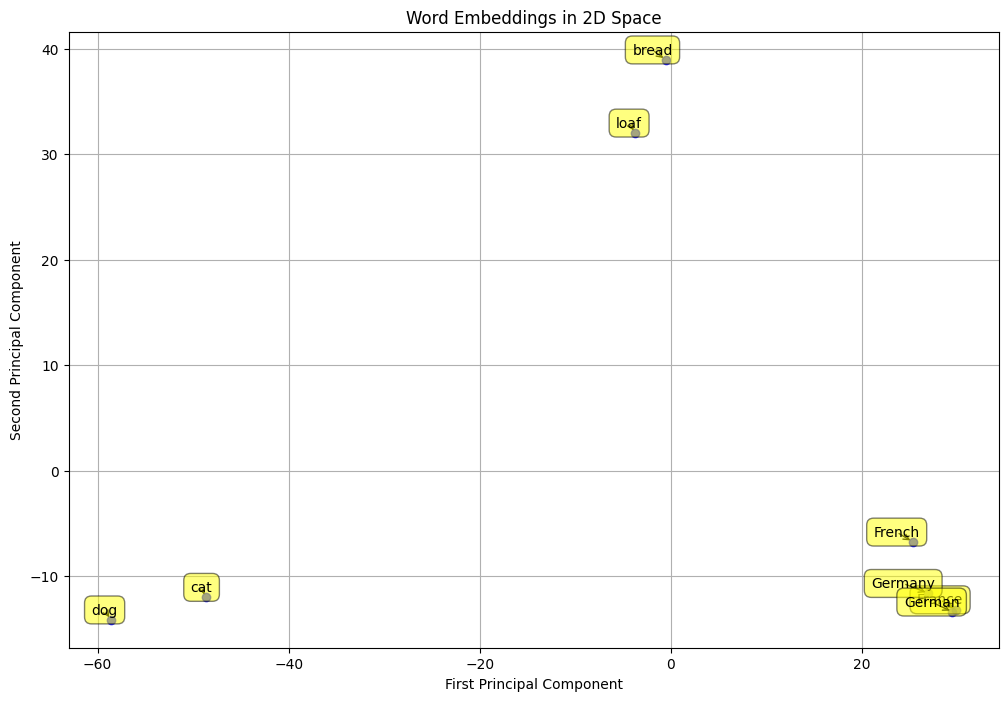

In [36]:



# List of words to examine
words = ["cat", "dog", "loaf", "bread", "French", "France", "Germany", "German"]

# Get word vectors
vectors = [nlp(word).vector for word in words]

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the words in 2D space
plt.figure(figsize=(12, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='b', alpha=0.7)

for i, word in enumerate(words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.title("Word Embeddings in 2D Space")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Instead of plt.show(), we'll save the plot as an SVG
plt.savefig('../outputs/word_embeddings_2d.svg', format='svg')
print("Plot saved as 'word_embeddings_2d.svg'")

In [35]:
# Calculate and print distances between pairs
print("\nDistances between pairs:")
for i in range(len(words)):
    for j in range(i+1, len(words)):
        distance = np.linalg.norm(vectors_2d[i] - vectors_2d[j])
        print(f"{words[i]} - {words[j]}: {distance:.4f}")


Distances between pairs:
cat - dog: 10.1400
cat - loaf: 62.9095
cat - bread: 70.0965
cat - French: 74.2059
cat - France: 78.5760
cat - Germany: 75.6316
cat - German: 78.1856
dog - loaf: 71.6943
dog - bread: 78.6706
dog - French: 84.2560
dog - France: 88.4840
dog - Germany: 85.5791
dog - German: 88.0880
loaf - bread: 7.6344
loaf - French: 48.4408
loaf - France: 56.3023
loaf - Germany: 53.3263
loaf - German: 56.2414
bread - French: 52.5002
bread - France: 60.3290
bread - Germany: 57.5383
bread - German: 60.3177
French - France: 7.8639
French - Germany: 5.1272
French - German: 7.8242
France - Germany: 3.3198
France - German: 0.4488
Germany - German: 3.0943


Key Observations:

- Animal Cluster: "Cat" and "dog" should be relatively close, reflecting their semantic similarity as common pets.
- Food Cluster: "Loaf" and "bread" should be close, given their related meanings.
- Country-Language Pairs: "France" and "French" should be very close, as should "Germany" and "German".
- Semantic Categories: The animal words, food words, and country/language words should form distinct clusters, relatively far from each other.

This visualization helps us understand how word embeddings capture semantic relationships. Words with similar meanings or uses tend to cluster together in the vector space, while words with different meanings are farther apart. Even in this simplified 2D representation, we can see how the embedding space organizes words in a way that reflects their semantic relationships.

Remember, though, that this is a significant simplification of the original high-dimensional space. In the full embedding space, these relationships are even more nuanced and accurate.

# Document Embeddings

This approach not only works on words, but also on texts as a whole. This means that we can embed entire documents! This is the basis for how we will be creating our vector databases in the next notebook. Let's take a look at an example. Here, we are using the `en_core_web_md` model, but you should test the results when we use the `en_core_web_lg` model as well. What do you notice when you do this?

Plot saved as 'sentence_embeddings_2d.svg'


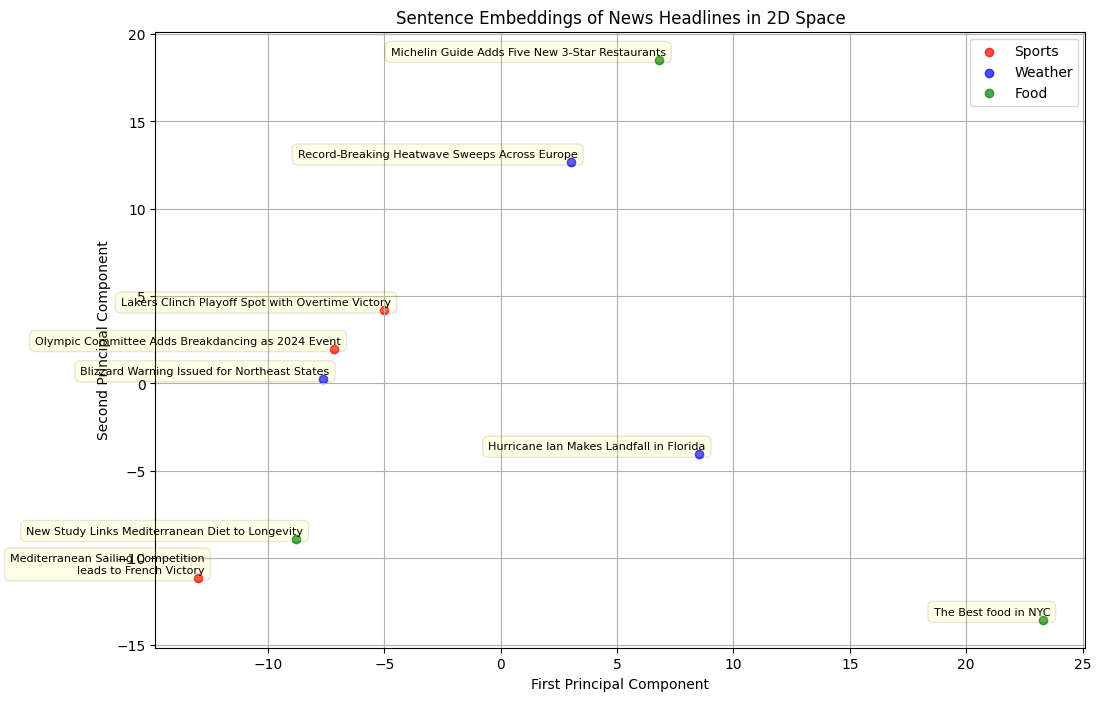

In [22]:
nlp = spacy.load("en_core_web_md")
# Sample news headlines
headlines = [
    # Sports
    "Lakers Clinch Playoff Spot with Overtime Victory",
    "Mediterranean Sailing Competition leads to French Victory",
    "Olympic Committee Adds Breakdancing as 2024 Event",
    # Weather
    "Hurricane Ian Makes Landfall in Florida",
    "Record-Breaking Heatwave Sweeps Across Europe",
    "Blizzard Warning Issued for Northeast States",
    # Food
    "New Study Links Mediterranean Diet to Longevity",
    "Michelin Guide Adds Five New 3-Star Restaurants",
    "The Best food in NYC",
]

categories = ["Sports", "Sports", "Sports", "Weather", "Weather", "Weather", "Food", "Food", "Food"]

# Get sentence vectors
vectors = [nlp(headline).vector for headline in headlines]

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (headline, category) in enumerate(zip(headlines, categories)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(headline, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Sentence Embeddings of News Headlines in 2D Space")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
for category, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)
plt.legend()

# Save the plot as an SVG
plt.savefig('../outputs/sentence_embeddings_2d.svg', format='svg', bbox_inches='tight')
print("Plot saved as 'sentence_embeddings_2d.svg'")

As you test this approach with different models, it is important to remember that no two models embed data the same way. Different models will perform differently on your data. In some cases, if your data is very unique, you may need to train your own model from scratch. However, it is always best to explore more sophisticated models first. A great way to do that, is to use this exact same method, but with a transformer.

# Advantages of Transformers

In the above examples, we have seen how non-transformer machine learning models produce embeddings. While these methods have been effective, the invention of the Transformer architecture in 2017 revolutionized the field of natural language processing and significantly improved the quality of text embeddings.

## The Invention of the Transformer

The Transformer architecture was introduced in the seminal paper "Attention Is All You Need" by Vaswani et al. in 2017. This model was designed to overcome limitations of previous sequence-to-sequence models, particularly in handling long-range dependencies in text.

Key innovations of the Transformer include:

1. Self-Attention Mechanism: This allows the model to weigh the importance of different words in a sentence when processing each word, regardless of their positional distance.

2. Positional Encoding: This enables the model to understand the order of words without using recurrence or convolution.

3. Parallel Processing: Unlike recurrent models, Transformers can process all words in a sentence simultaneously, greatly speeding up training and inference.

## Training of Transformers

Transformers are typically trained on massive amounts of text data using self-supervised learning techniques. Two primary pre-training objectives are:

1. Masked Language Modeling (MLM): The model is tasked with predicting masked words in a sentence, forcing it to understand context and semantics.

2. Next Sentence Prediction (NSP): The model learns to predict whether two sentences naturally follow each other, helping it understand discourse-level relationships.

This pre-training allows Transformers to learn rich, contextual representations of language without requiring labeled data.

## How Transformers Affect Text Embedding

Transformer-based models have significantly improved the quality of text embeddings in several ways:

1. Contextual Embeddings: Unlike static word embeddings (like Word2Vec or GloVe), Transformer models produce contextual embeddings. This means that the same word can have different embeddings based on its context in a sentence.

2. Handling Polysemy: Because of contextual embeddings, Transformers can better handle words with multiple meanings (polysemy). For example, the word "bank" would have different embeddings in "river bank" versus "bank account."

3. Capturing Long-range Dependencies: The self-attention mechanism allows Transformers to capture relationships between words that are far apart in a sentence, something that was challenging for previous models.

4. Subword Tokenization: Many Transformer models use subword tokenization, allowing them to handle out-of-vocabulary words and capture morphological information.

5. Transfer Learning: Pre-trained Transformer models can be fine-tuned on specific tasks with relatively small amounts of labeled data, leading to state-of-the-art performance on many NLP tasks.

6. Sentence-level Understanding: Transformers are trained to understand entire sentences or even paragraphs, not just individual words. This leads to more meaningful sentence-level embeddings.

When we use a Transformer-based model like the Sentence Transformer in our example below, we're leveraging these advantages. The embeddings produced are not just based on the individual words, but on a deep, contextual understanding of the entire sentence.

This is why Transformer-based embeddings often perform better in downstream tasks and why they can capture more nuanced relationships between sentences. In our visualization, this might manifest as more meaningful clustering of related headlines, even when they don't share many of the same words.

The development of Transformers has been a significant leap forward in NLP, enabling more sophisticated understanding and generation of language, and producing higher-quality text embeddings that capture the complexities and nuances of human language.

/Applications/anaconda3/envs/tap/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Plot saved as 'sentence_embeddings_2d_transformers.svg'


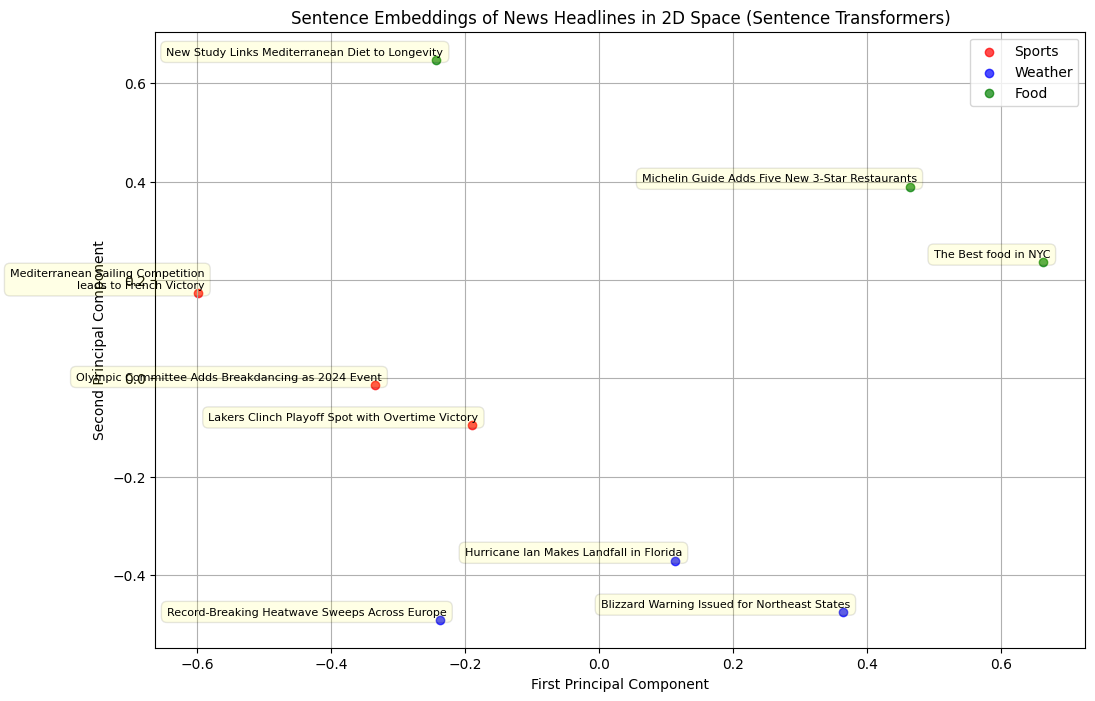

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

# Load the Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get sentence vectors
vectors = model.encode(headlines)

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

colors = {'Sports': 'red', 'Weather': 'blue', 'Food': 'green'}
for i, (headline, category) in enumerate(zip(headlines, categories)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=colors[category], alpha=0.7)
    plt.annotate(headline, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), 
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Sentence Embeddings of News Headlines in 2D Space (Sentence Transformers)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
for category, color in colors.items():
    plt.scatter([], [], c=color, alpha=0.7, label=category)
plt.legend()

# Save the plot as an SVG
plt.savefig('../outputs/sentence_embeddings_2d_transformers.svg', format='svg', bbox_inches='tight')
print("Plot saved as 'sentence_embeddings_2d_transformers.svg'")